# Human Resources Data Set

**Introduction:**

This data set contains employees informations like names, DOBs, age, gender, marital status, date of hire, reasons for termination, department, whether they are active or terminated, position title, pay rate, manager name, and performance score. And I'm going to explore this data to get some observations and answers of some questions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('HRDataset_v14.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


# Descriptive analysis

(A) Data Wrangling

Assessment & Cleaning

In [3]:
df.shape[0]

311

In [4]:
df.dtypes

Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [6]:
sum(df.duplicated())

0

In [7]:
df.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


# (B) Data Exploration

**Univariate**

**What is the gender of the most employees ?**

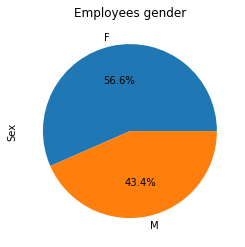

In [8]:
df['Sex'].value_counts().plot(kind='pie',autopct='%1.1f%%');
plt.title('Employees gender');

**What is the Performance Score of the empoyees ?**

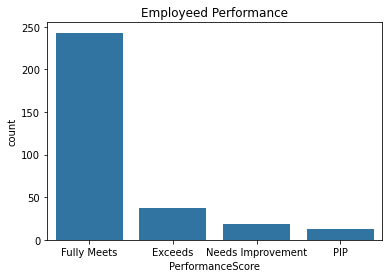

In [9]:
bas_color = sb.color_palette()[0]
ordered = df['PerformanceScore'].value_counts().index
sb.countplot(data=df, x= 'PerformanceScore', color=bas_color, order = ordered);
plt.title('Employeed Performance');

**How Many employees have been terminated and why?**

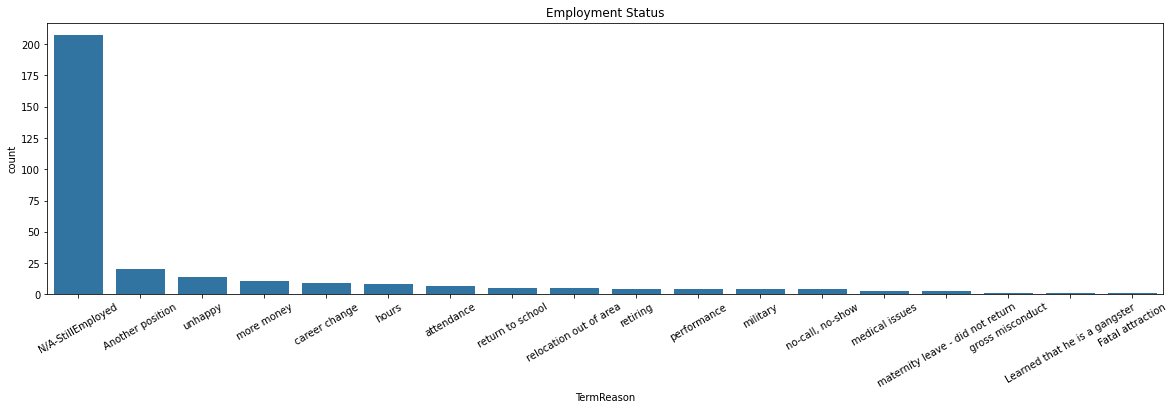

In [10]:
plt.figure(figsize = [20, 5])
bas_color = sb.color_palette()[0]
ordered = df['TermReason'].value_counts().index
sb.countplot(data=df, x= 'TermReason', color=bas_color, order = ordered);
plt.title('Employment Status');
plt.xticks(rotation=30);

**What is the salary scale in the copmany ?**

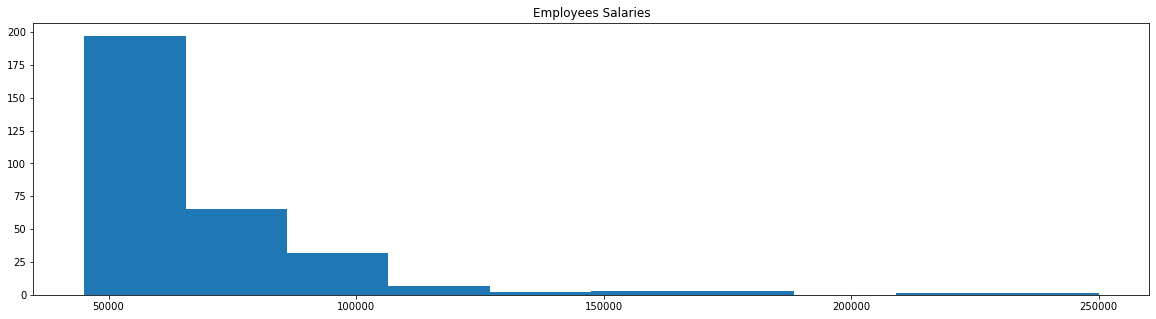

In [11]:
plt.figure(figsize = [20, 5])
bas_color = sb.color_palette()[0]
plt.hist(data=df, x= 'Salary', color=bas_color);
plt.title('Employees Salaries');

**What is the scale of Employees Satisfaction?**

In [12]:
df['EmpSatisfaction'].unique()

array([5, 3, 4, 2, 1], dtype=int64)

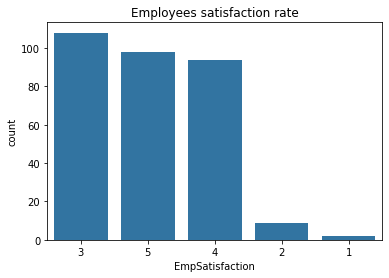

In [13]:
bas_color = sb.color_palette()[0]
Orderr = df['EmpSatisfaction'].value_counts().index
sb.countplot(data=df, x='EmpSatisfaction', color =bas_color, order=Orderr);
plt.title('Employees satisfaction rate');

**Bivariate**

**What is the relationship between Recruitment Source & Performance Score?**

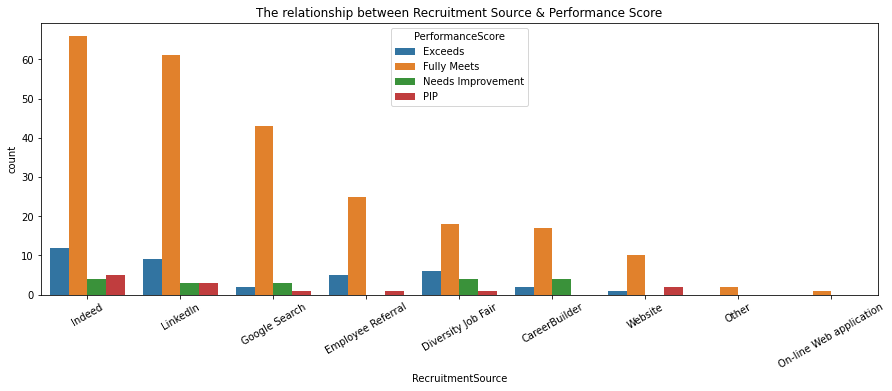

In [14]:
plt.figure(figsize = [15, 5])
Ord = df['RecruitmentSource'].value_counts().index
sb.countplot(data= df, x='RecruitmentSource', hue ='PerformanceScore', order=Ord);
plt.xticks(rotation=30);
plt.title('The relationship between Recruitment Source & Performance Score');

**What is the relationship between Employees Satisfaction & Special Projects Count ?**

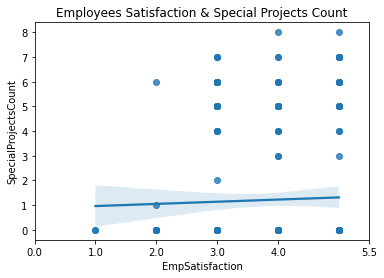

In [15]:
sb.regplot(data = df, x = 'EmpSatisfaction', y = 'SpecialProjectsCount');
tick_x = [0,1, 2, 3, 4,5.5]
plt.xticks(tick_x);
plt.title('Employees Satisfaction & Special Projects Count');

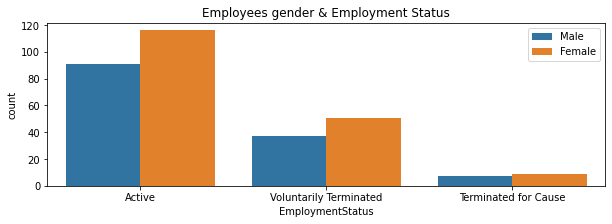

In [16]:
plt.figure(figsize = [10, 3])
Ord = df['EmploymentStatus'].value_counts().index
sb.countplot(data= df, x='EmploymentStatus', hue ='Sex', order=Ord);
plt.title('Employees gender & Employment Status');
plt.legend(['Male', 'Female']);

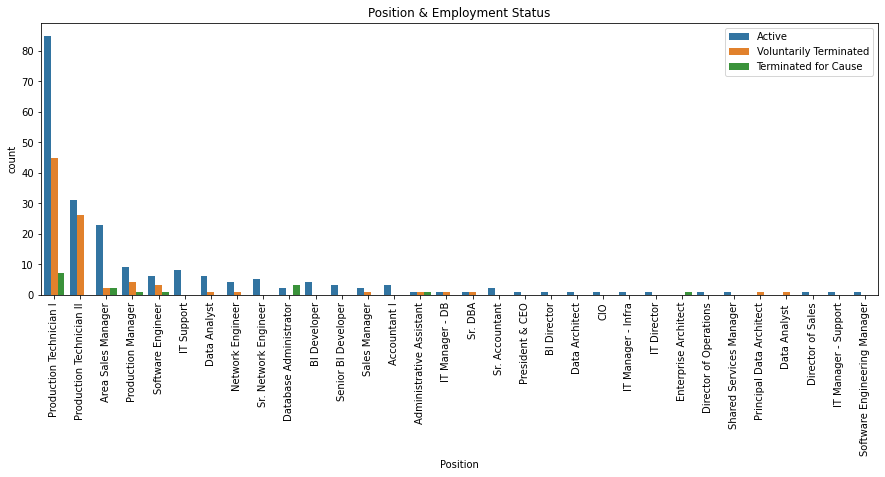

In [17]:
plt.figure(figsize = [15, 5])
Ord = df['Position'].value_counts().index
sb.countplot(data= df, x='Position', hue ='EmploymentStatus', order=Ord);
plt.xticks(rotation=30);
plt.title('Position & Employment Status');
plt.xticks(rotation=90);
plt.legend(['Active','Voluntarily Terminated','Terminated for Cause'] ,loc='upper right');

**Multivariate**

**The relationship between DaysLate & Absences & PerformanceScore.**

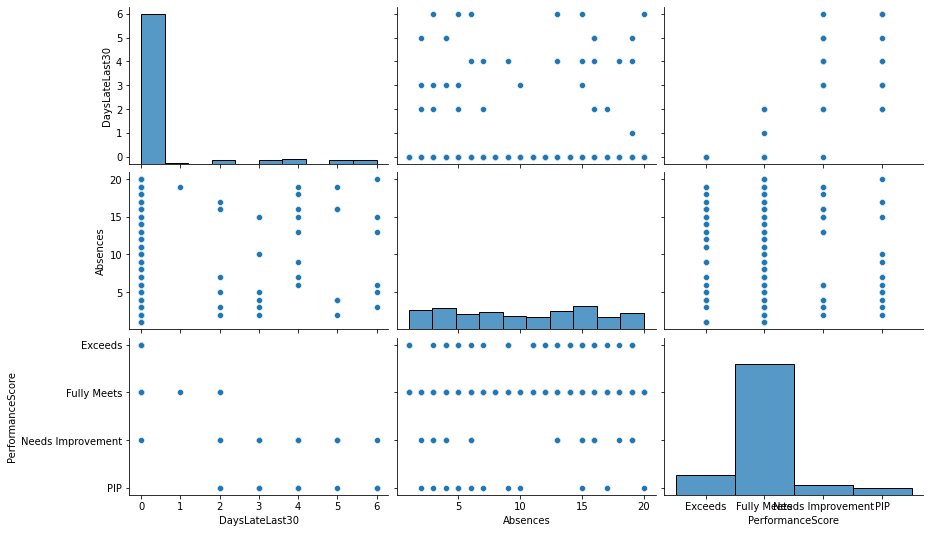

In [18]:
sb.pairplot(df, x_vars=["DaysLateLast30", "Absences", "PerformanceScore"],
    y_vars=["DaysLateLast30", "Absences","PerformanceScore"], height=2.5, aspect=1.75);

**The department names that has the best performance and satisfied employees.**

In [19]:
Perfor_Satis = df.query('PerformanceScore == "Exceeds" & EmpSatisfaction == 5')
Perfor_Satis

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,...,Amy Dunn,11.0,LinkedIn,Exceeds,5.00,5,0,1/7/2019,0,15
55,"Corleone, Vito",10019,0,0,1,1,5,4,0,170500,...,Janet King,2.0,Indeed,Exceeds,3.70,5,0,2/4/2019,0,15
76,"Dougall, Eric",10028,0,0,1,1,3,4,0,138888,...,Jennifer Zamora,5.0,Indeed,Exceeds,4.30,5,5,1/4/2019,0,4
77,"Driver, Elle",10006,0,0,0,1,6,4,0,74241,...,Lynn Daneault,21.0,Indeed,Exceeds,4.77,5,0,1/27/2019,0,14
96,"Foss, Jason",10015,0,0,1,1,3,4,0,178000,...,Jennifer Zamora,5.0,Indeed,Exceeds,5.00,5,5,1/7/2019,0,15
212,"Patronick, Lucas",10005,0,0,1,5,4,4,1,108987,...,Alex Sweetwater,10.0,Diversity Job Fair,Exceeds,5.00,5,3,8/16/2015,0,13
217,"Peters, Lauren",10032,1,1,0,5,5,4,0,57954,...,Ketsia Liebig,19.0,Indeed,Exceeds,4.20,5,0,1/10/2013,0,12
220,"Petrowsky, Thelma",10016,1,1,0,1,3,4,0,93554,...,Simon Roup,4.0,Employee Referral,Exceeds,4.60,5,7,1/4/2019,0,16
232,"Rivera, Haley",10011,1,1,0,1,5,4,0,46738,...,Webster Butler,NaN,Google Search,Exceeds,4.36,5,0,2/11/2019,0,16


In [20]:
Row = [0,5,55,76,77,96,212,217,220,232,237,274,289,293,308]
column = ['Department']
top_Dep = df.loc[Row,column]
top_Dep

,Department
0,Production
5,Production
55,Production
76,IT/IS
77,Sales
96,IT/IS
212,Software Engineering
217,Production
220,IT/IS
232,Production


**The department names that has the lowest performance and satisfied employees.**

In [21]:
lw_Perfor_lwSatis = df.query('PerformanceScore == "PIP" & EmpSatisfaction == 1')
lw_Perfor_lwSatis

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
72,"Dietrich, Jenna",10304,0,0,0,1,6,1,0,59231,...,John Smith,17.0,Website,PIP,2.3,1,0,1/29/2019,2,17
83,"Erilus, Angela",10299,0,3,0,1,5,1,0,56847,...,Michael Albert,22.0,Indeed,PIP,3.0,1,0,2/25/2019,2,5


In [22]:
Rows = [72,83]
columns = ['Department']
low_Dep = df.loc[Rows,columns]
low_Dep

,Department
72,Sales
83,Production


**The relationship between Employment Status & Performance Score & Employees Satisfaction.**

In [23]:
def Performance_rate (PerformanceScore):
    if PerformanceScore == 'Exceeds':
        return 4
    elif PerformanceScore == 'Fully Meets':
        return 3
    elif PerformanceScore == 'Needs Improvement':
        return 2
    elif PerformanceScore == 'PIP':
        return 1

df['Performance_rate'] = df.apply(lambda x: Performance_rate(x['PerformanceScore']), axis=1)

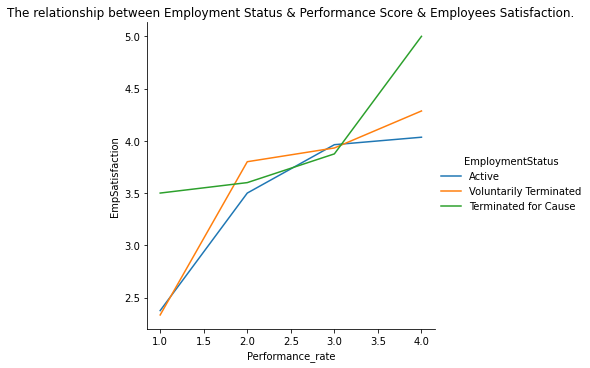

In [24]:
def mean_poly(x, y, bins = 10, **kwargs):
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
    data_bins = pd.cut(x, bins, right = False,
                     include_lowest = True)
    means = y.groupby(data_bins).mean()
    plt.errorbar(x = bin_centers, y = means, **kwargs)

bin_edges = np.arange(0.5, df['Performance_rate'].max()+1, 1)
g = sb.FacetGrid(data = df, hue = 'EmploymentStatus', height = 5)
g.map(mean_poly, "Performance_rate", "EmpSatisfaction", bins = bin_edges)
g.set_ylabels('EmpSatisfaction')
plt.title('The relationship between Employment Status & Performance Score & Employees Satisfaction.')
g.add_legend();

**The relationship between Department & Performance Score & Employees Satisfaction.**

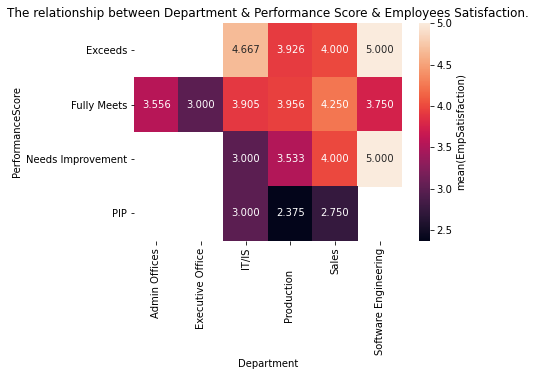

In [25]:
means = df.groupby(['Department', 'PerformanceScore']).mean()['EmpSatisfaction']
means = means.reset_index(name = 'EmpSatisfaction_avg')
means = means.pivot(index = 'PerformanceScore', columns = 'Department',
                            values = 'EmpSatisfaction_avg')
sb.heatmap(means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(EmpSatisfaction)'});
plt.title('The relationship between Department & Performance Score & Employees Satisfaction.');

# Prediction analysis

In [26]:
df[['Active', 'Volun','Terminated']] = pd.get_dummies(df['EmploymentStatus'])
df = df.drop('Active', axis = 1)
df = df.drop('Volun', axis = 1)

In [27]:
df = df.drop('GenderID', axis = 1)

In [28]:
df[['F', 'M']] = pd.get_dummies(df['Sex'])

In [29]:
import statsmodels.api as sm

In [30]:
df['intercept'] = 1
Reg_model = sm.Logit(df['Terminated'], df[['intercept','MarriedID','F','FromDiversityJobFairID']])
Result = Reg_model.fit()
Result.summary2()

Optimization terminated successfully.
         Current function value: 187.004992
         Iterations 5


C:\Users\User 33\anaconda3\anacon\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\User 33\anaconda3\anacon\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\User 33\anaconda3\anacon\lib\site-packages\statsmodels\discrete\discrete_model.py:3500: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                Logit             Pseudo R-squared:  inf        
Dependent Variable:   Terminated        AIC:               116325.1053
Date:                 2021-09-03 04:50  BIC:               116340.0645
No. Observations:     311               Log-Likelihood:    -58159.    
Df Model:             3                 LL-Null:           0.0000     
Df Residuals:         307               LLR p-value:       1.0000     
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       5.0000                                          
----------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------
intercept              -1.2731   0.2331 -5.4623 0.0000 -1.7299 -0.8163
MarriedID               0.3430   0.2600  1.3189 0.1872 -0.1667  0.8526
F                       0.1010   0.2606  0.3876 0.6983 -0.4098  0.6119
FromDiversityJobFairID  1.3002   0.3999  3.2514 0.0011  0.5164  2.0840
======================================================================

"""

In [31]:
np.exp(0.3430),np.exp(0.1010),np.exp(1.3002)

(1.4091687619264508, 1.1062766417634236, 3.670030600343594)

**Conclusions:**

- The dataset contains 311 employees, 56.6% are females and 43,4% are males.
- The performance evaluation shows that most of the employees fully meet the requirements and there is a good percentage of those who exceed these requirements or expectations.
- The most common reasons of leaving their jobs as a resignation or termination are (Another opportunities - unsatisfaction - better offers and the attendance & working hours policy)
- The average of the most salaries are from 4.5k to 6k.
- Most employees have an average or above average satisfaction rate.
- As for the recruitment resources, The most resources are used are indeed and Linkedin (and the employees who get hired from there have a good performance score) also there are another two resources (Online web page application & career builder ) that are the best regarding the employees performance although there is no too much depend on them .
- The relationship between Employees Satisfaction & Special Projects Count is very slightly positive.
- The percentage of the employees who have a very low performance and satisfaction rate are very small.
- Married employees are 1.4% more likely to be terminated for cause also Females are 1.1% more likely than males and Employees who hired for From Diversity JobFair are 3.7% more likely to be terminated for cause. 
